In [1]:
import glob
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load in the blast values as dataframes and save to nested dictionary, where 1st key is metagenome and second key is SAG. Values are the blast results as pandas dataframe

In [2]:
results = {} #initialize empty dictionary
for file in glob.glob("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/data/frag_recruit/"+"*.tsv"): #loop over blast outputs
    MG, SAG = file.split("/")[-1].split(".")[0:2] #assign names to variables
    if MG not in results: #make value of 1st key a dictionary if not already present
        results[MG]={}
    results[MG][SAG]=pd.read_table(file, header=None) #save blast result

Make sure you have the expected number of dataframes. 89 metagenomes * 41 SAGs = 3649 pairs

In [3]:
ct=0
for key in results:
    ct+=len(results[key])
ct

3649

Yup.

Next I'll loop through the dfs in the dictionary and save the the number of rows to another dictionary with identical key values. The number of rows is equal to the number of hits, becuase I ran blast with max_target_seqs 1 and max_hsps 1, so all queries with hits only have one hit (no repeated query IDs). 

In [4]:
hits = {}
for MG in results:
    if MG not in hits:
        hits[MG] = {}
    for SAG in results[MG]:
        hits[MG][SAG] = results[MG][SAG].loc[(results[MG][SAG][2]>=95) & (results[MG][SAG][3]>=200)].shape[0]

In [5]:
hits_df = pd.DataFrame(hits) #turn the nested dictionary into a pandas df

In [6]:
hits_df

,GS388,GS358,GS116,GS122,GS035,GS112,GS362,GS353,GS391,GS108,...,GS236,GS369,GS110,GS115,GS366,GS352,MED,GS026,GS117,GS119
AAA160-B08,19,0,0,0,0,0,0,20,2,0,...,0,0,0,0,5,0,0,0,0,0
AAA190-1F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAA076-C03,4,45,0,0,1,10,35,3,2,10,...,8,12,0,0,10,9,0,0,4,0
AAA298-N10,0,0,44,57,14,1944,0,0,0,690,...,0,0,208,36,0,0,23,169,229,102
AAA160-I06,2,0,0,0,0,0,0,5,0,0,...,0,0,0,0,41,0,0,0,0,0
AAA076-F14,19,1,0,0,0,0,0,17,5,0,...,1,2,1,0,40,7,1,0,3,0
AAA164-M04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,5,0,0,0
AAA168-F10,6,0,0,0,0,0,0,1,1,0,...,0,0,0,0,8,0,7,1,0,0
AAA160-J14,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,339,0,3,0,0,0
AAA015-O19,0,0,105,161,2207,1113,0,0,0,118,...,0,0,93,10,7,0,56,16,646,28


So now we have a dataframe with the number of hits for each MG SAG pair. I need to get these in the right order using the files I made by using a image to text tool online from a screenshot of the figure. 

In [7]:
rownames=pd.read_table("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/wrangling/fig3_rownames.txt", header=None)
colnames=pd.read_table("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/wrangling/fig3_colnames.txt", header=None)

Now I want to check if I actually have the same values for columns and rows between these files and the dataframe I created, because that will mess things up. 

In [8]:
set(hits_df.columns.values).symmetric_difference(set(colnames.loc[:,1]))
set(hits_df.index.values).symmetric_difference(set((rownames.loc[:,2])))

set()

set()

Cool. Looks like there are no difference between the values. 

In [9]:
hits_df = hits_df.reindex(rownames.loc[:,2])[colnames.loc[:,1]]
hits_df

,GS123,GS122,GS121,GS120,GS119,GS149,GS148,GS117,GS116,GS115,...,GS359,GS360,GS357,GS347,GS362,GS358,GS363,GS346,GS364,GS366
2,,,,,,,,,,,,,,,,,,,,,
AAA076-C03,1,0,1,1,0,0,1,4,0,0,...,15,7,32,2,35,45,5,5,1,10
AAA160-J14,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,16,27,339
AAA076-P09,0,0,0,0,0,1,0,0,0,0,...,5,3,2,0,2,4,3,4,9,5
AAA076-P13,0,2,1,0,0,0,2,11,1,0,...,2,5,5,1,5,10,19,20,30,31
AAA168-I18,0,1,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAA168-P09,1,2,1,0,0,1,1,2,1,0,...,2,5,7,2,1,9,27,14,31,40
AAA160-D02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAA076-D02,0,0,0,0,0,0,0,0,0,0,...,2,15,12,5,3,0,3,6,1,50
AAA076-D13,0,0,0,0,0,0,0,0,0,0,...,9,13,16,5,0,0,0,3,1,32


Okay great we have all number of hits with >=200bp alignments and >=95% identity in a dataframe with the rows and columns in the same order as Fig. 3. Now I have to make this a percentage of total filtered MG read number and normalize to SAG size (per Mbp)

I got the MG sequence count in bash with the code below.

In [10]:
#for i in *.fa.gz; do echo $(basename $i _filtered.fa.gz) >> file1; zcat $i |grep -c ">" >> file2;  done
#paste file1 file2 > MG_seq_cts.txt

Now I have to read this in:

In [11]:
MG_cts = pd.read_table("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/wrangling/MG_seq_cts.txt", header=None, index_col=0)

In [12]:
MG_cts=MG_cts.transpose()[hits_df.columns.values]

In [13]:
MG_cts

,GS123,GS122,GS121,GS120,GS119,GS149,GS148,GS117,GS116,GS115,...,GS359,GS360,GS357,GS347,GS362,GS358,GS363,GS346,GS364,GS366
1,104894,109670,108774,43888,59819,106731,101282,346480,59817,59880,...,405871,377363,479184,445611,445916,347614,410526,409709,411130,376414


In [14]:
hits_percent = hits_df.div(MG_cts.loc[1,])
hits_percent = hits_percent.multiply(100)

In [15]:
hits_percent 

,GS123,GS122,GS121,GS120,GS119,GS149,GS148,GS117,GS116,GS115,...,GS359,GS360,GS357,GS347,GS362,GS358,GS363,GS346,GS364,GS366
2,,,,,,,,,,,,,,,,,,,,,
AAA076-C03,0.000953,0.000000,0.000919,0.002279,0.000000,0.000000,0.000987,0.001154,0.000000,0.000000,...,0.003696,0.001855,0.006678,0.000449,0.007849,0.012945,0.001218,0.001220,0.000243,0.002657
AAA160-J14,0.000000,0.000000,0.000919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000265,0.000000,0.000000,0.000000,0.000000,0.000974,0.003905,0.006567,0.090060
AAA076-P09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000937,0.000000,0.000000,0.000000,0.000000,...,0.001232,0.000795,0.000417,0.000000,0.000449,0.001151,0.000731,0.000976,0.002189,0.001328
AAA076-P13,0.000000,0.001824,0.000919,0.000000,0.000000,0.000000,0.001975,0.003175,0.001672,0.000000,...,0.000493,0.001325,0.001043,0.000224,0.001121,0.002877,0.004628,0.004882,0.007297,0.008236
AAA168-I18,0.000000,0.000912,0.000919,0.000000,0.000000,0.001874,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAA168-P09,0.000953,0.001824,0.000919,0.000000,0.000000,0.000937,0.000987,0.000577,0.001672,0.000000,...,0.000493,0.001325,0.001461,0.000449,0.000224,0.002589,0.006577,0.003417,0.007540,0.010627
AAA160-D02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAA076-D02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000493,0.003975,0.002504,0.001122,0.000673,0.000000,0.000731,0.001464,0.000243,0.013283
AAA076-D13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002217,0.003445,0.003339,0.001122,0.000000,0.000000,0.000000,0.000732,0.000243,0.008501


Cool this is starting to look good (despite the values looking crazy low). Now I have to import the SAG sizes and divide by those. This file contains the size of the genomes after removing contigs smaller than 2000bp.

In [16]:
SAG_sizes = pd.read_table("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/data/frag_recruit/SAG_stats_postfilter.txt", sep="\s+", thousands=',')
SAG_sizes

,file,format,type,num_seqs,sum_len,min_len,avg_len,max_len
0,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,23,610392,2479,26538.8,118550
1,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,26,633929,2061,24381.9,101540
2,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,46,1675687,2036,36428.0,230567
3,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,67,1659465,2144,24768.1,132181
4,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,31,1945064,2030,62744.0,411663
5,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,33,1741071,2103,52759.7,243562
6,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,33,1620351,2001,49101.5,303172
7,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,25,920677,2011,36827.1,363639
8,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,27,1743891,2149,64588.6,342580
9,/vortexfs1/omics/env-bio/collaboration/genome-...,FASTA,DNA,20,972097,2452,48604.9,282203


I want to remove the filepath and extensions:

In [17]:
SAG_sizes['file'] = SAG_sizes['file'].str.strip('/vortexfs1/omics/env-bio/collaboration/genome-streamlining/data/frag_recruit/')
SAG_sizes['file'] = SAG_sizes['file'].str.rstrip('_filtered.')
SAG_sizes = SAG_sizes.set_index('file')
SAG_sizes = pd.DataFrame(SAG_sizes.loc[:,'sum_len'])
SAG_sizes = SAG_sizes.reindex(hits_percent.index.values)
SAG_sizes = SAG_sizes.div(1000000)
SAG_sizes


,sum_len
file,
AAA076-C03,1.945064
AAA160-J14,0.704711
AAA076-P09,0.972097
AAA076-P13,1.288439
AAA168-I18,0.934640
AAA168-P09,1.280822
AAA160-D02,0.810582
AAA076-D02,1.741071
AAA076-D13,1.620351


Now to divide the hit percentages by these values.

In [18]:
hits_percent_norm = hits_percent.div(list(SAG_sizes["sum_len"]), axis=0)
hits_percent_norm

,GS123,GS122,GS121,GS120,GS119,GS149,GS148,GS117,GS116,GS115,...,GS359,GS360,GS357,GS347,GS362,GS358,GS363,GS346,GS364,GS366
2,,,,,,,,,,,,,,,,,,,,,
AAA076-C03,0.000490,0.000000,0.000473,0.001171,0.000000,0.000000,0.000508,0.000594,0.000000,0.000000,...,0.001900,0.000954,0.003433,0.000231,0.004035,0.006656,0.000626,0.000627,0.000125,0.001366
AAA160-J14,0.000000,0.000000,0.001305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000376,0.000000,0.000000,0.000000,0.000000,0.001383,0.005542,0.009319,0.127798
AAA076-P09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000964,0.000000,0.000000,0.000000,0.000000,...,0.001267,0.000818,0.000429,0.000000,0.000461,0.001184,0.000752,0.001004,0.002252,0.001366
AAA076-P13,0.000000,0.001415,0.000714,0.000000,0.000000,0.000000,0.001533,0.002464,0.001298,0.000000,...,0.000382,0.001028,0.000810,0.000174,0.000870,0.002233,0.003592,0.003789,0.005663,0.006392
AAA168-I18,0.000000,0.000976,0.000984,0.000000,0.000000,0.002005,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAA168-P09,0.000744,0.001424,0.000718,0.000000,0.000000,0.000732,0.000771,0.000451,0.001305,0.000000,...,0.000385,0.001034,0.001141,0.000350,0.000175,0.002021,0.005135,0.002668,0.005887,0.008297
AAA160-D02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAA076-D02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000283,0.002283,0.001438,0.000644,0.000386,0.000000,0.000420,0.000841,0.000140,0.007629
AAA076-D13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001369,0.002126,0.002061,0.000692,0.000000,0.000000,0.000000,0.000452,0.000150,0.005247


Okay this is what we want. Now we just have to plot it.

In [27]:
import seaborn as sb
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.colors import Colormap
from matplotlib.colors import LogNorm

(41, 0)

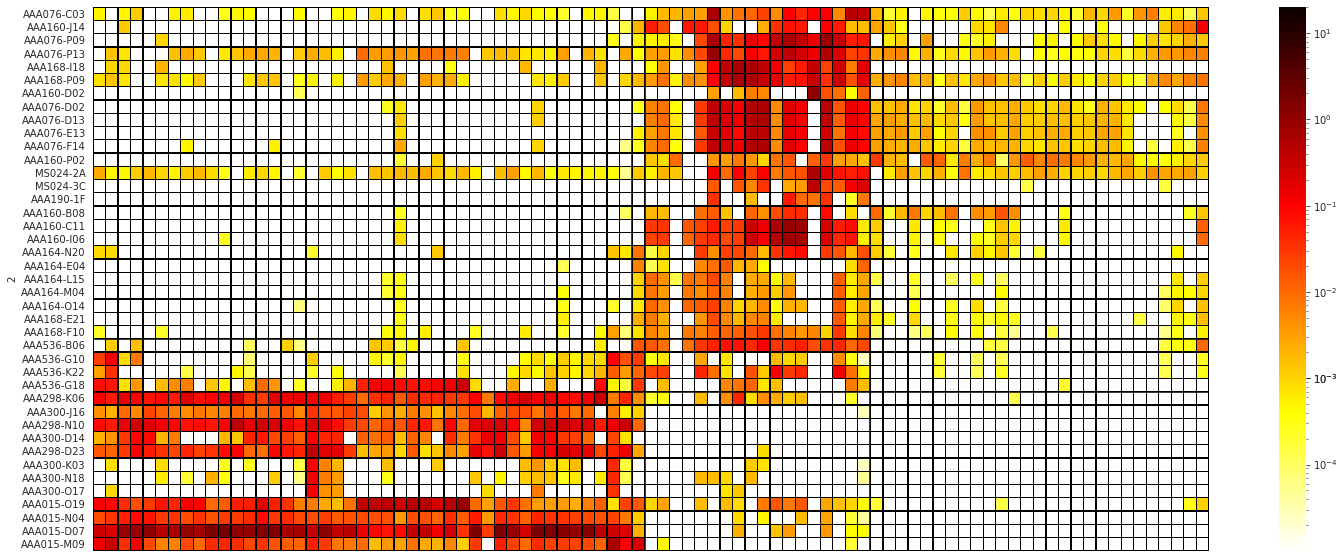

In [28]:
fig, ax = plt.subplots(figsize=(25, 10))
sb.set_style("dark")
log_norm = LogNorm(vmin=hits_percent_norm.min().min(), vmax=hits_percent_norm.max().max())
plot = sb.heatmap(hits_percent_norm, norm=log_norm, cmap="hot_r", linewidths=0.25, linecolor="black", vmin=0.00001, vmax=20, cbar_kws={"ticks":[0,0.0001,0.001,0.001,0.01,0.1,1,10]})
plt.setp(plot.set_xticklabels([]))
ax.set_facecolor("white")
ax.set_ylim(len(hits_percent_norm),0)
ax.axhline(25, color='black', linewidth=1.5)
ax.axhline(29, color='black', linewidth=1.5)
ax.axvline(43, color='black', linewidth=1.5)
ax.axvline(44, color='black', linewidth=1.5)
ax.axvline(62, color='black', linewidth=1.5)
#cb.outline.set_color('black')
#cb.outline.set_linewidth(2)
plt.show()
plot = plot.get_figure()
plot.savefig("../output/plots/recreated_fig3.png", dpi=400)
